<a href="https://colab.research.google.com/github/Shashivadhan1911/Heart_attack_prediction_using_RF-publication-/blob/main/HEARTATTACK_PREDICTION_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 519k/519k [00:00<00:00, 85.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os

In [ ]:
pip install shap

In [ ]:
# Load the dataset
# Replace 'heart.csv' with the path to your dataset file
data = pd.read_csv(os.path.join(path, 'heart_attack_prediction_dataset.csv'))

In [ ]:
train_path = path+'/train'
test_path = path+'/test'


In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
print(data.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [ ]:
print(data.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (you can choose VGG19 or others as well)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input_shape as needed

# Freeze the layers of the VGG16 model
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)

# *** Replace 'num_classes' with the actual number of classes/folders in your dataset ***
num_classes = 10  # Example: Assuming you have 10 classes
prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 250,890 (980.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

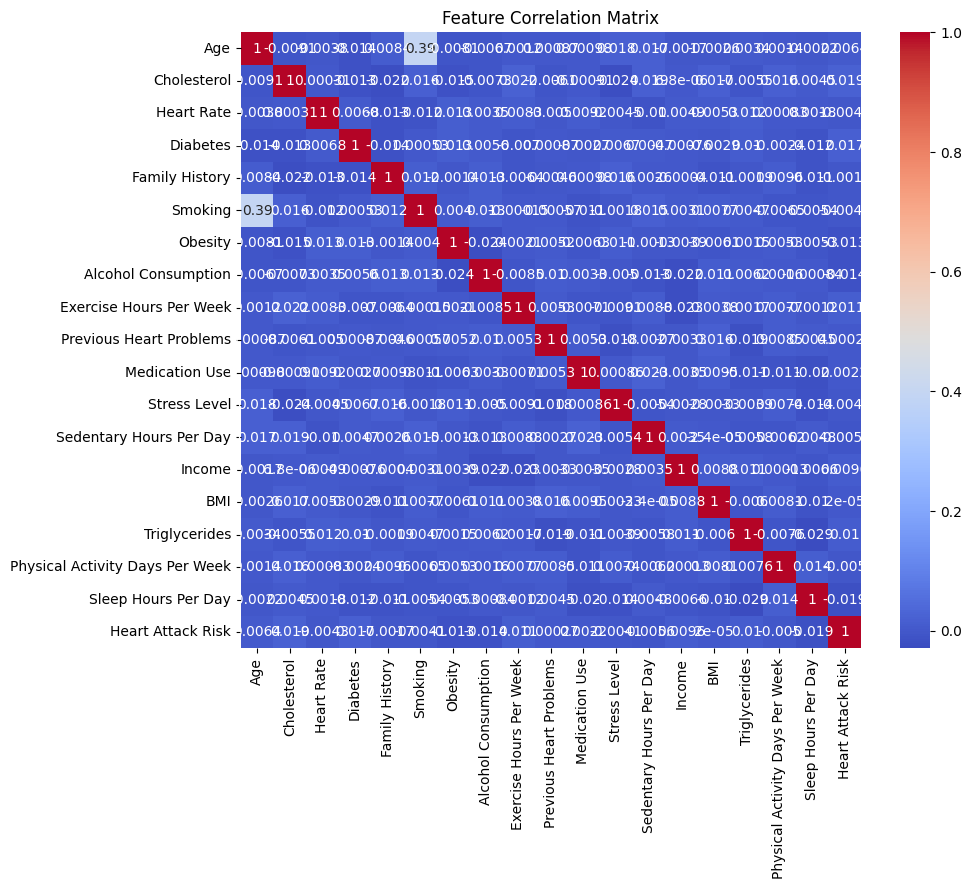

In [ ]:
plt.figure(figsize=(10, 8))
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(columns=['Patient ID', 'Blood Pressure', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

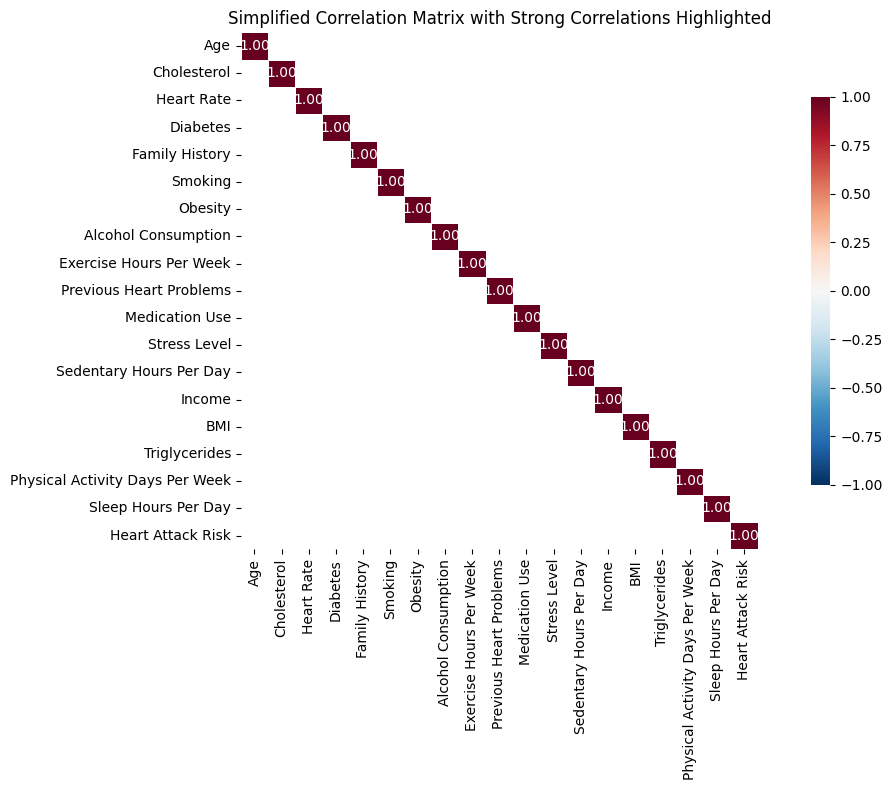

In [ ]:
# Compute the correlation matrix
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(columns=['Patient ID', 'Blood Pressure', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere'])
corr = numeric_data.corr()

# Set a threshold for highlighting only strong correlations
threshold = 0.5
mask_weak = (abs(corr) < threshold)  # Mask values below threshold

# Mask the lower triangle of the correlation matrix for clarity
mask_triangle = np.tril(np.ones(corr.shape), k=-1).astype(bool)

# Combine masks
mask = mask_weak | mask_triangle

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr,
            mask=mask,
            cmap='RdBu_r',
            annot=True,
            fmt=".2f",
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .75})
plt.title("Simplified Correlation Matrix with Strong Correlations Highlighted")
plt.tight_layout()
plt.show()

In [ ]:
# Define feature variables (X) and target variable (y)
# Define feature variables (X) and target variable (y)
# Assuming the target column is named 'output' instead of 'target'
X = data.drop(columns='Heart Attack Risk')  # Replace 'output' with the actual name of your target column if it's different
y = data['Heart Attack Risk']               # 1 for heart disease, 0 for no heart disease

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load dataset
# Assuming 'data' DataFrame is already loaded from previous cells

# Define feature variables (X) and target variable (y)
X = data.drop(columns='Heart Attack Risk')
y = data['Heart Attack Risk']

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop non-numeric columns before standardization
non_numeric_cols = ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
X_train_nn = X_train_nn.drop(columns=non_numeric_cols)
X_test_nn = X_test_nn.drop(columns=non_numeric_cols)


# Standardize the features
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

# Build a neural network model
model = Sequential([
    Dense(32, input_shape=(X_train_nn.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train_nn, y_train_nn, epochs=10, validation_data=(X_test_nn, y_test_nn), batch_size=32, verbose=1)

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'data' is not defined

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
SHAP values shape: (10, 18, 1)
X_test[:10] shape: (10, 18)


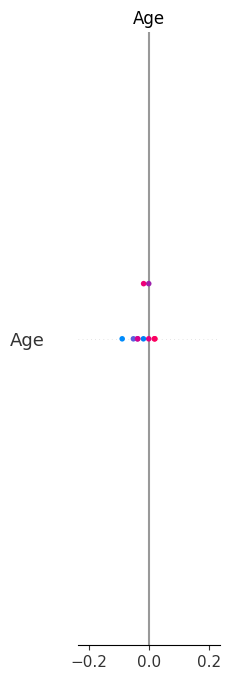

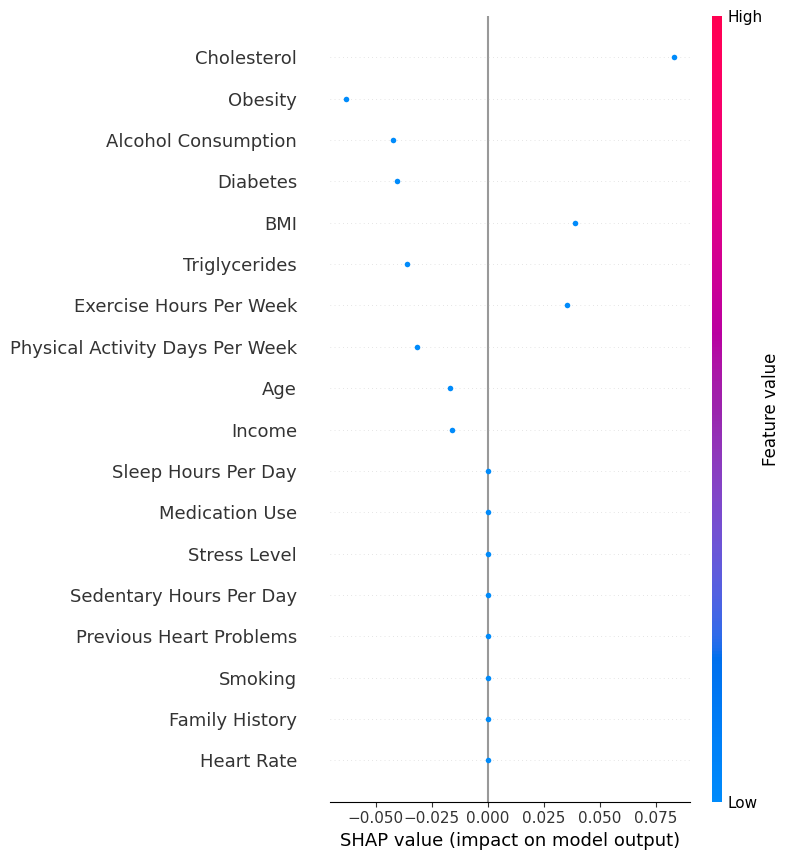

In [ ]:
import shap
import numpy as np
shap.initjs()

# --- SHAP Explainer ---
explainer = shap.KernelExplainer(
    model.predict,
    shap.sample(X_train, 100),   # background: 100 training samples
    link="logit"
)

# --- Compute SHAP values for first 10 test samples ---
shap_values = explainer.shap_values(X_test[:10])

# Handle list vs ndarray output
if isinstance(shap_values, list):
    shap_values_array = np.array(shap_values[0])   # shape: (10, n_features)
else:
    shap_values_array = np.array(shap_values)

print(f"SHAP values shape: {shap_values_array.shape}")
print(f"X_test[:10] shape: {X_test[:10].shape}")

# --- Feature names ---
non_numeric_cols = ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
temp_df_features = data.drop(columns=non_numeric_cols + ['Heart Attack Risk'], errors='ignore')
feature_names = temp_df_features.columns.tolist()

# --- Global Summary Plot ---
shap.summary_plot(shap_values_array, X_test[:10], feature_names=feature_names)

# --- Local Explanation for a Single Sample ---
sample_idx = 0
expected_value = (
    explainer.expected_value[0]
    if isinstance(explainer.expected_value, (list, np.ndarray))
    else explainer.expected_value
)

# Both as 2D row vectors
sample_shap_values = shap_values_array[sample_idx].reshape(1, -1)
sample_features = np.array(X_test[sample_idx]).reshape(1, -1)

# Summary Plot for that one sample (bar style)
shap.summary_plot(
    sample_shap_values,
    sample_features,
    feature_names=feature_names
)

shap.force_plot(expected_value, sample_shap_values, sample_features, feature_names=feature_names)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Data Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=['Patient ID']),
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

categorical_cols = ['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']

# ---------------- Preprocessor ----------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as they are
)

# ---------------- Pipeline ----------------
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=10,
        class_weight="balanced"
    ))
])

# ---------------- Train ----------------
rf_model.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)

# ---------------- Metrics ----------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# ---------------- Results ----------------
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Heart Attack', 'Heart Attack']))

# ---------------- Confusion Matrix Plot ---------------


Model Accuracy: 35.82%
Precision: 0.36
Sensitivity (Recall): 1.00
Specificity: 0.00
F1 Score: 0.53
ROC AUC: 0.50

Confusion Matrix:
[[   0 1125]
 [   0  628]]

Classification Report:
                 precision    recall  f1-score   support

No Heart Attack       0.00      0.00      0.00      1125
   Heart Attack       0.36      1.00      0.53       628

       accuracy                           0.36      1753
      macro avg       0.18      0.50      0.26      1753
   weighted avg       0.13      0.36      0.19      1753



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


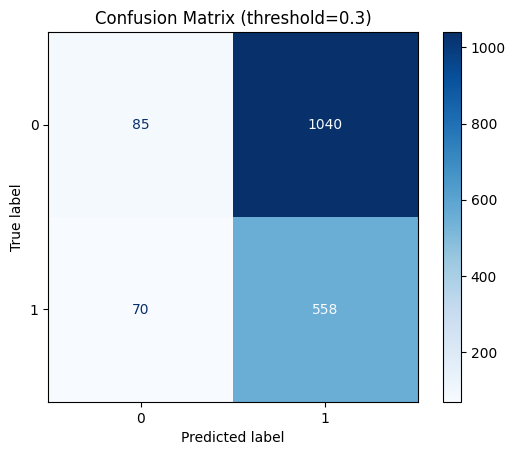

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Get predicted probabilities for class 1 using the predict method
# Use the test data specifically for the Neural Network (X_test_nn)
y_proba = model.predict(X_test_nn)

# Try a lower threshold
threshold = 0.3
# Convert probabilities to binary predictions based on the threshold
y_pred = (y_proba >= threshold).astype(int)

# Confusion matrix
# Use the true labels for the Neural Network's test data (y_test_nn)
cm = confusion_matrix(y_test_nn, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()

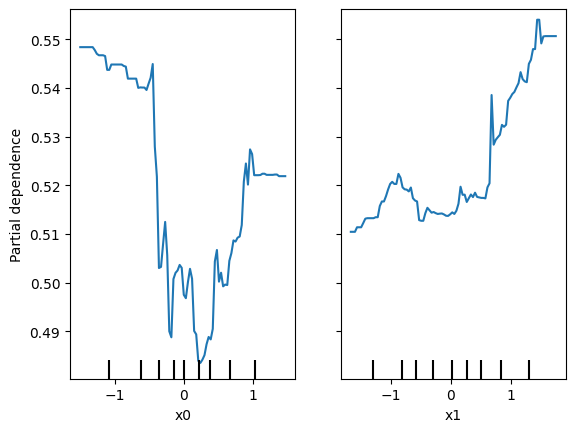

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate Partial Dependence Plot for feature indices 0 and 1
features = [0, 1]
PartialDependenceDisplay.from_estimator(model, X_test, features)

# Save the PDP as an EPS file
plt.savefig('partial_dependence_plot.eps', format='eps')

# Display the plot
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6161 - loss: 0.6697 - val_accuracy: 0.6418 - val_loss: 0.6601
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6477 - loss: 0.6501 - val_accuracy: 0.6429 - val_loss: 0.6600
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6392 - loss: 0.6521 - val_accuracy: 0.6418 - val_loss: 0.6609
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6409 - loss: 0.6463 - val_accuracy: 0.6423 - val_loss: 0.6625
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6427 - loss: 0.6467 - val_accuracy: 0.6423 - val_loss: 0.6634
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6430 - loss: 0.6415 - val_accuracy: 0.6429 - val_loss: 0.6647
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6441 - loss: 0.6393 - val_accuracy: 0.6418 - val_loss: 0.6638
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6500 - loss: 0.6319 - val_accuracy: 0.

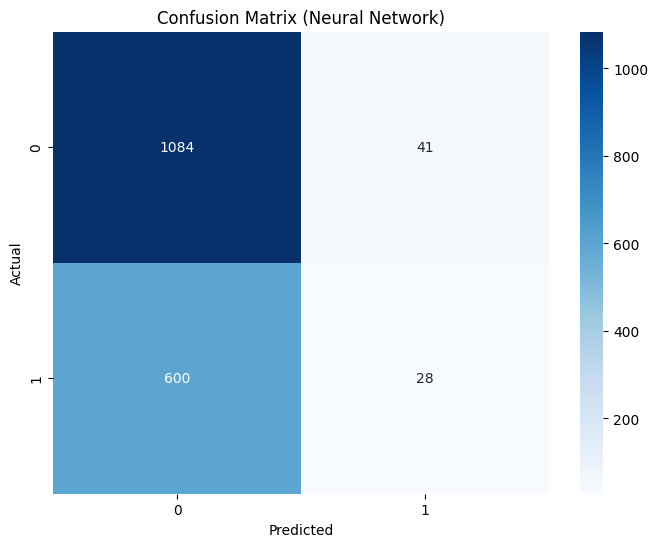

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import kagglehub
import os


# Download latest version of the dataset and get the path
# Ensure kagglehub is installed if not already
# %pip install kagglehub
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")


# Load the dataset
# Replace 'heart.csv' with the path to your dataset file
data = pd.read_csv(os.path.join(path, 'heart_attack_prediction_dataset.csv'))


# Define feature variables (X) and target variable (y)
X = data.drop(columns='Heart Attack Risk')
y = data['Heart Attack Risk']

# Split the data into training and testing sets for the Neural Network
# Use different variable names to avoid conflict with Random Forest data split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop non-numeric columns before standardization for the Neural Network
non_numeric_cols = ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
X_train_nn = X_train_nn.drop(columns=non_numeric_cols)
X_test_nn = X_test_nn.drop(columns=non_numeric_cols)

# Standardize the features for the Neural Network
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

# Build the neural network model
model = Sequential([
    Dense(32, input_shape=(X_train_nn.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train_nn, y_train_nn, epochs=10, validation_data=(X_test_nn, y_test_nn), batch_size=32, verbose=1)


# Evaluate the neural network model on the test set
loss, accuracy = model.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f"Neural Network Model Accuracy: {accuracy * 100:.2f}%")

# Get predictions for precision, recall, and F1-score
y_pred_prob = model.predict(X_test_nn)
y_pred = (y_pred_prob > 0.5).astype("int32") # Convert probabilities to binary predictions

# Calculate evaluation metrics
precision = precision_score(y_test_nn, y_pred)
recall = recall_score(y_test_nn, y_pred)  # Sensitivity is the same as recall
f1 = f1_score(y_test_nn, y_pred)

# Calculate confusion matrix
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred)
tn, fp, fn, tp = conf_matrix_nn.ravel()

# Calculate specificity: TN / (TN + FP)
specificity = tn / (tn + fp)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix (Neural Network):")
print(conf_matrix_nn)

# Display a full classification report
print("\nClassification Report (Neural Network):")
class_report_nn = classification_report(y_test_nn, y_pred, target_names=['No Heart Attack', 'Heart Attack'])
print(class_report_nn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()